In [1]:
# ライブラリのインポート
#%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
from sklearn import datasets

In [2]:
# ワインデータのダウンロード
wine = datasets.load_wine()
X = wine.data
y = wine.target

# 特徴量と正解ラベルを訓練データとテストデータに分割
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

# 特徴量の標準化
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std =sc.transform(X_test)

# 特徴量は13個
X_train_std.shape,  X_test_std.shape

((142, 13), (36, 13))

In [3]:
from sklearn.decomposition import KernelPCA

# 削除後の次元を2に指定し、主成分分析を実行
KPCA = KernelPCA(n_components=2, kernel='rbf', gamma=0.3, random_state=0)

# 訓練データで主成分分析のモデル作成
X_train_kpca = KPCA.fit_transform(X_train_std)
# 訓練データで作成したモデルでテストデータを主成分分析
X_test_kpca = KPCA.transform(X_test_std)

# 特徴量は2個
X_train_kpca.shape, X_test_kpca.shape

((142, 2), (36, 2))

In [4]:
# ロジスティック回帰モデルを作成
model = LogisticRegression( multi_class='ovr', max_iter=100, solver='liblinear', penalty='l2', random_state=0)

# モデルの訓練
model.fit(X_train_kpca, y_train)

# テストデータで正解率を計算
y_test_pred = model.predict(X_test_kpca)
ac_score = accuracy_score(y_test, y_test_pred)
print('正解率 = %.2f' % (ac_score))

正解率 = 1.00


<Axes: >

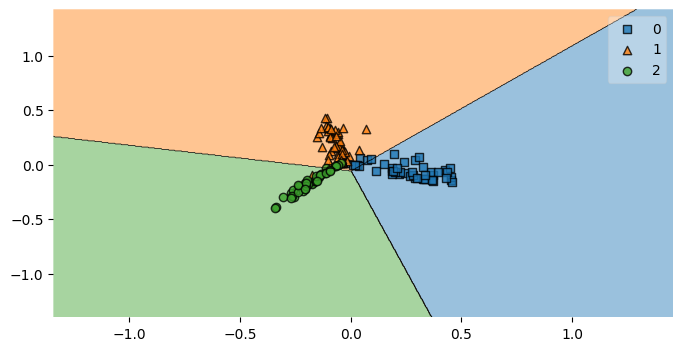

In [5]:
# 訓練データのプロット
plt.figure(figsize=(8,4)) #プロットのサイズ指定
plot_decision_regions(X_train_kpca, y_train, model)

<Axes: >

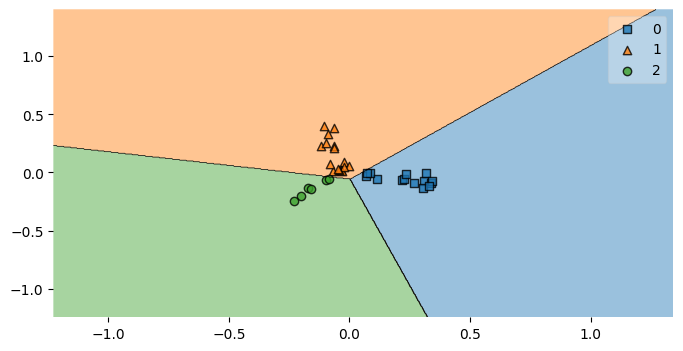

In [6]:
# テストデータのプロット
plt.figure(figsize=(8,4)) #プロットのサイズ指定
plot_decision_regions(X_test_kpca, y_test, model)